In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import  train_test_split

#**Reading Data**

In [ ]:
import pandas as pd
df = pd.read_csv("Student_Performance.csv")

# **Exploratory Analysis**

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [ ]:
df.shape

(10000, 6)

In [ ]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [ ]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [ ]:
#seperate Categorical and continous features
def catconsep(df):
  cat = list(df.columns[df.dtypes=='object'])
  con = list(df.columns[df.dtypes!='object'])
  return cat,con




In [ ]:
pd.DataFrame(con)

,0
0,Hours Studied
1,Previous Scores
2,Sleep Hours
3,Sample Question Papers Practiced
4,Performance Index


In [ ]:
cat,con = catconsep(df)
cat


['Extracurricular Activities']

In [ ]:
con

['Hours Studied',
 'Previous Scores',
 'Sleep Hours',
 'Sample Question Papers Practiced',
 'Performance Index']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

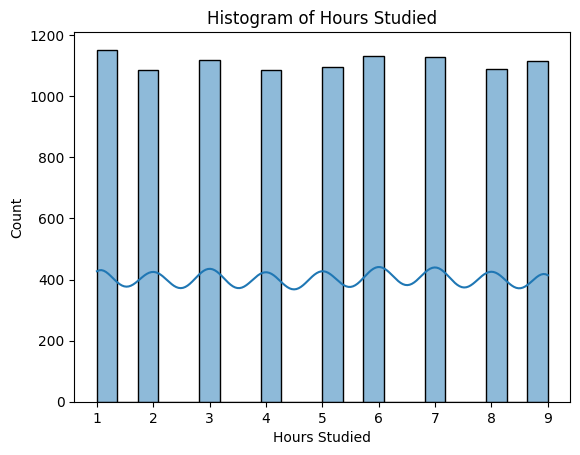

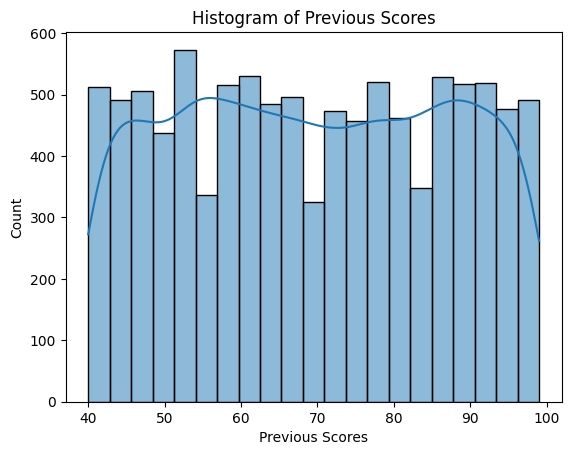

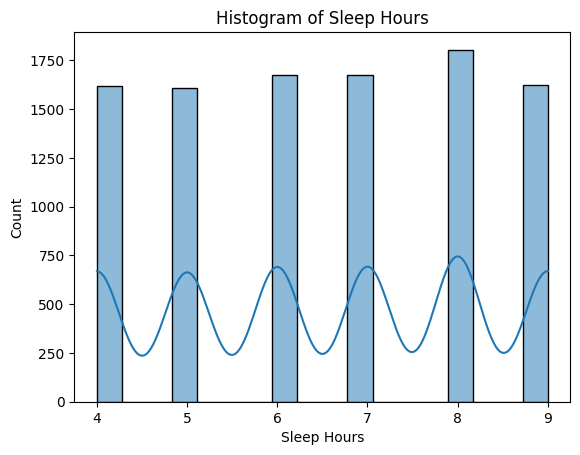

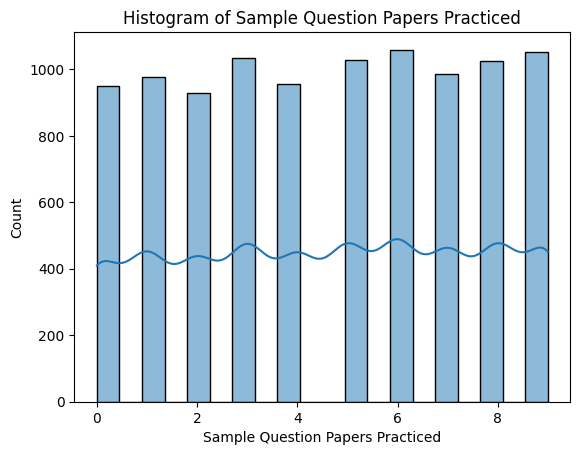

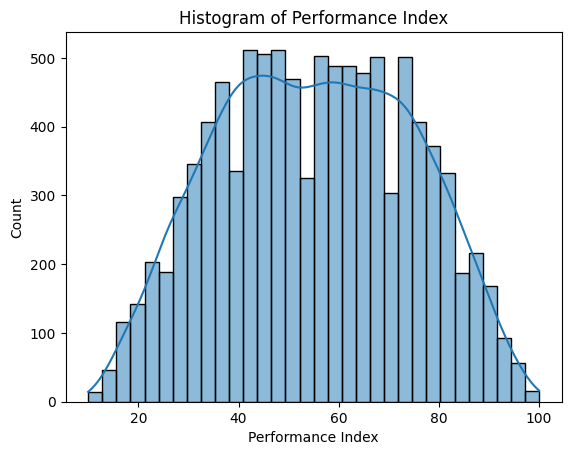

In [ ]:
for i in con:
  sns.histplot(data = df , x = i , kde = True)
  plt.title(f'Histogram of {i}')
  plt.show()

<Axes: ylabel='count'>

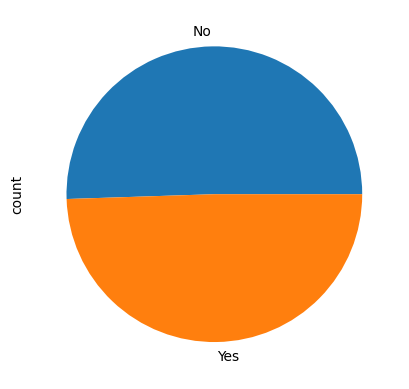

In [ ]:
df['Extracurricular Activities'].value_counts().plot(kind='pie')

<Axes: >

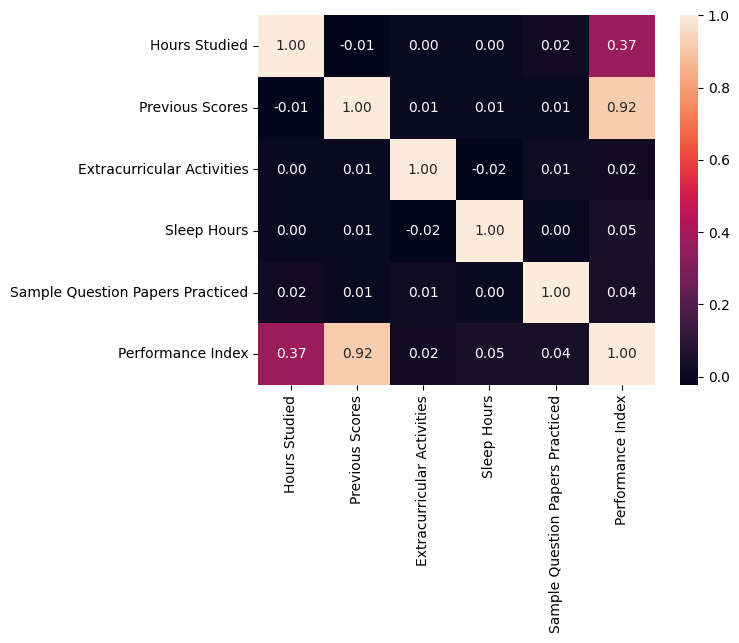

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Yes' is a value in a categorical column named 'column_name'
label_encoder = LabelEncoder()
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

# Now, you can safely calculate the correlation matrix and create the heatmap
sns.heatmap(df.corr(),annot= True, fmt ='.2f')

In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


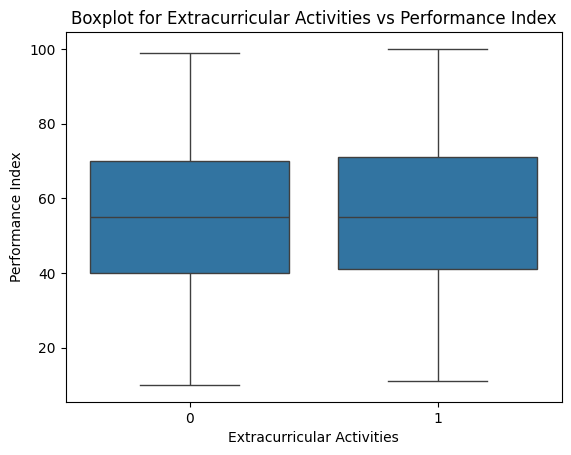

In [ ]:
sns.boxplot(data=df,x=df['Extracurricular Activities'], y= df['Performance Index'])
plt.xlabel = ('Extracurricular Activities')
plt.ylabel = ('Performance Index')
plt.title('Boxplot for Extracurricular Activities vs Performance Index')
plt.show()

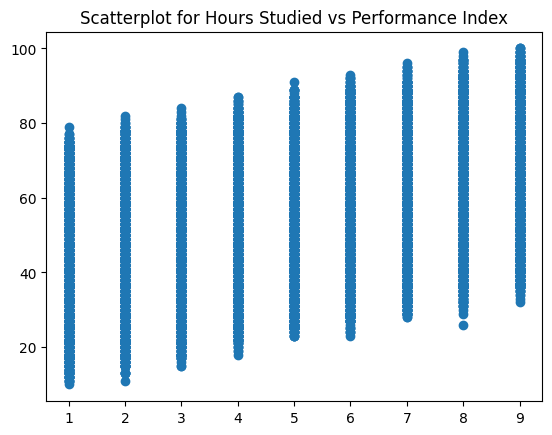

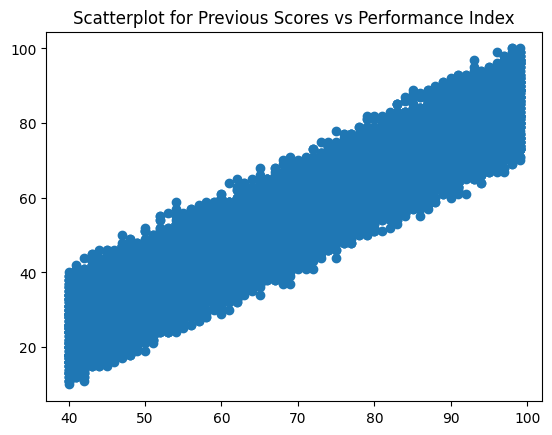

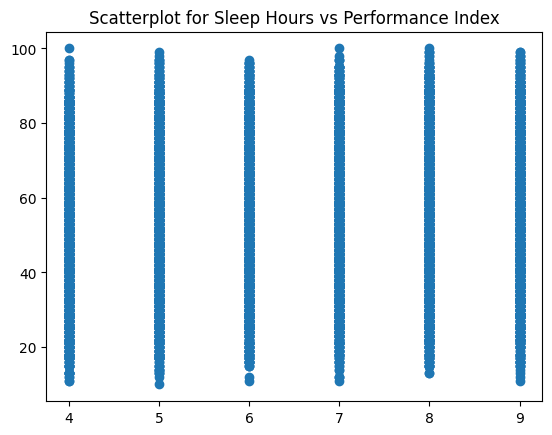

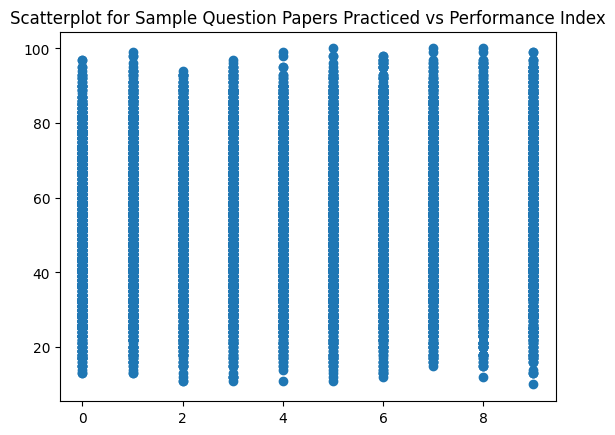

In [ ]:
# scatterplot
for i in con:
    if i!='Performance Index':
        plt.scatter(df[i],df['Performance Index'])
        plt.title(f'Scatterplot for {i} vs Performance Index')
        plt.show()

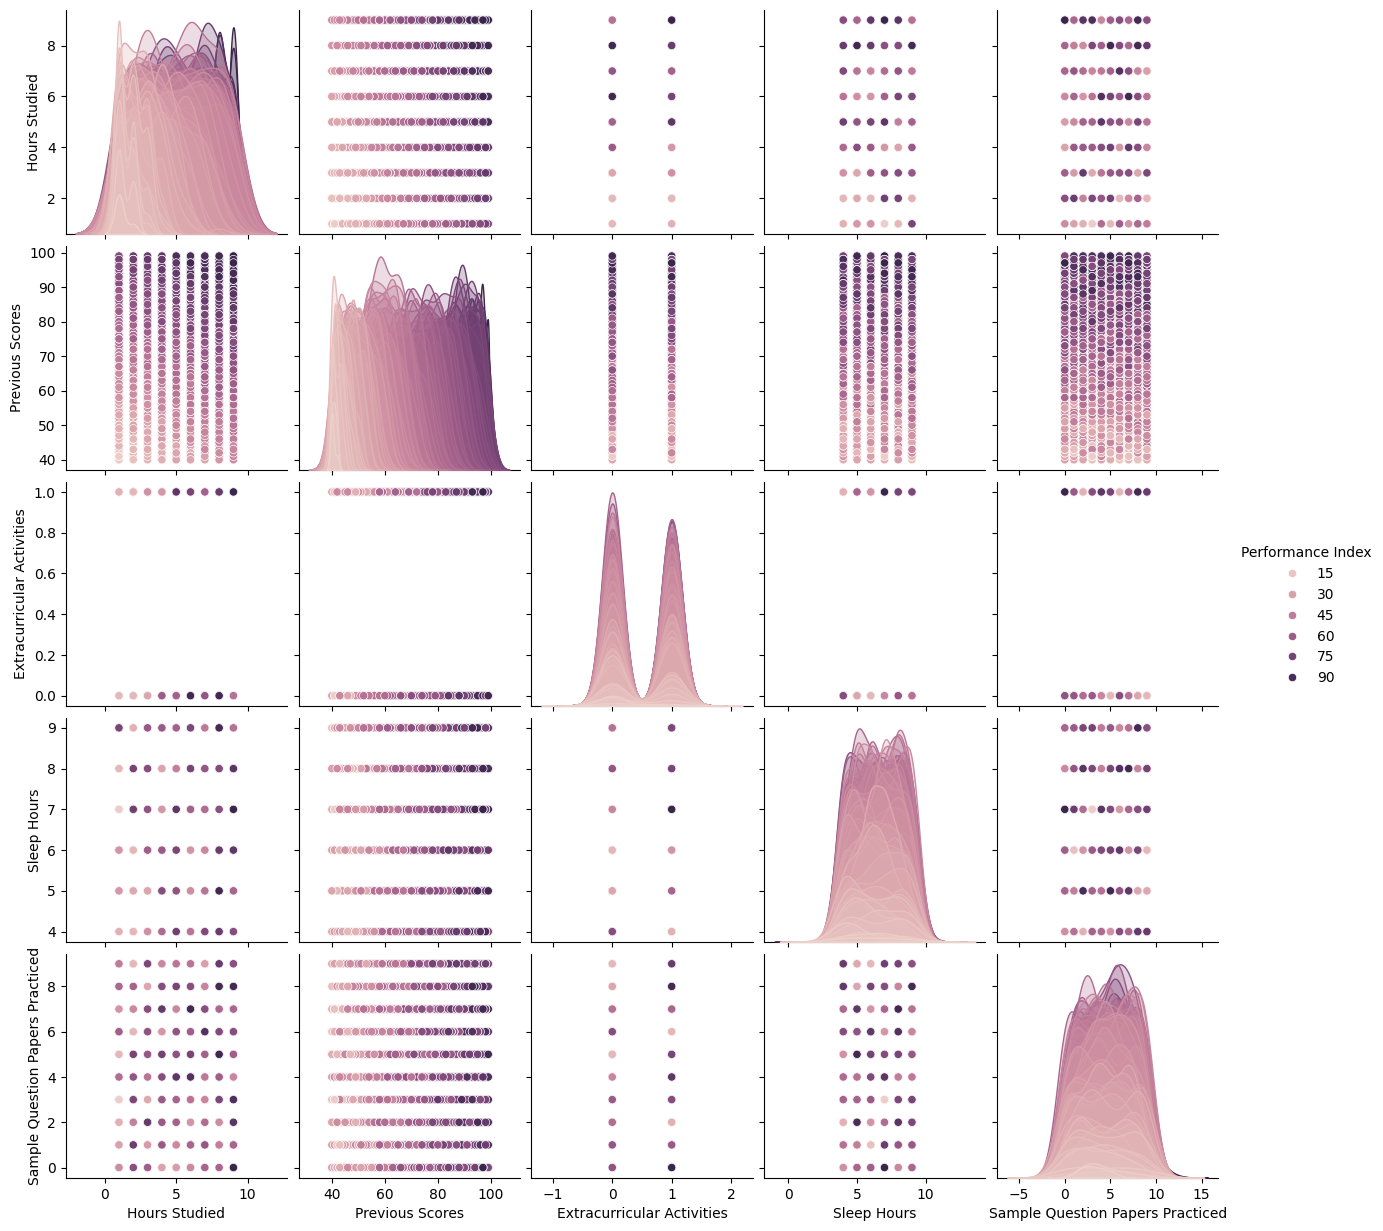

In [ ]:
sns.pairplot(data=df,hue='Performance Index')
plt.show()

In [ ]:
X = df.drop(columns = ['Performance Index'])

Y = df[['Performance Index']]

In [ ]:
Y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=21)

In [ ]:
xtrain.shape

(8000, 5)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
model.score(xtrain,ytrain)

0.988716967469377

In [ ]:
model.score(xtest,ytest)

0.9888763071047979

In [ ]:
preds = model.predict(xtest)
preds

array([[73.91020091],
       [42.59597836],
       [34.37456296],
       ...,
       [37.86638393],
       [37.43857732],
       [43.10239641]])

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, preds)
mae

1.6294216366159107

In [ ]:
from google.colab import drive
drive.mount('/content/drive')